### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-04,459873,5029839,751859,608671,288887,141826,132283,238784,118804,96351,87477,127417,126921,4849,200350
2021-11-05,460265,5038372,753926,609060,289131,142019,132334,239943,118830,96492,87504,127456,127053,4849,200373
2021-11-06,460791,5044871,754310,609388,289674,142174,132365,241095,118855,96529,87504,127488,127173,4849,200409
2021-11-07,461057,5049265,754429,609447,289734,142236,132391,242241,118866,96563,87504,127533,127299,4849,200430
2021-11-08,461389,5055955,755647,609573,289734,142293,132423,243405,118924,96731,87558,127571,127439,4849,200469


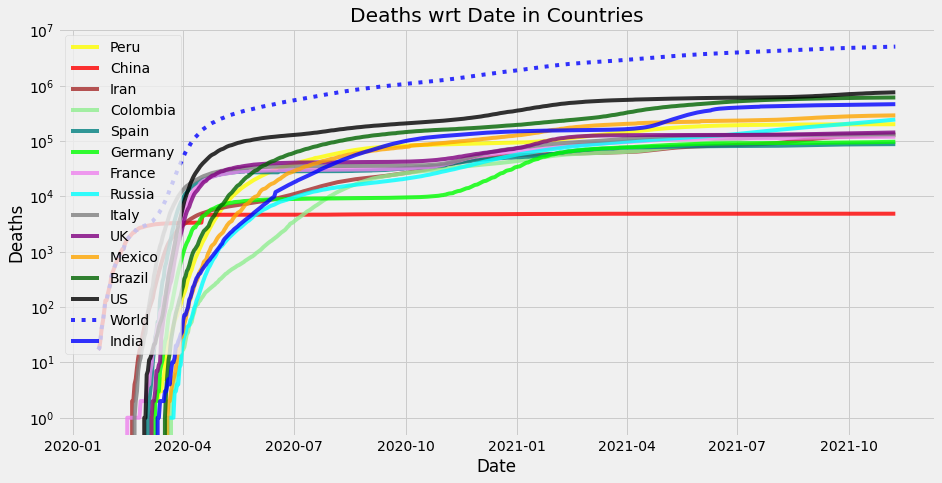

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-04,12729,525369,81566,13352,2660,36963,5902,39117,9397,37640,3291,1908,9862,85,1114
2021-11-05,10929,511741,96665,13321,3763,33972,6761,39617,9083,33785,3093,1975,8633,61,1062
2021-11-06,10826,411520,29856,11866,7188,30454,6760,40210,9664,23788,0,1999,6803,76,1070
2021-11-07,11478,332412,21968,6115,1382,29889,5822,38028,8559,12788,0,2061,7554,90,994
2021-11-08,10126,489783,125491,5638,0,32325,4547,38257,2241,23714,6417,1917,8341,62,340


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-04,15870,441048,81923,12297,4103,40160,3843,34179,5992,17194,2157,1577,10965,59,814
2021-11-05,15540,445761,82906,12365,4081,39747,4038,34541,6198,18300,2219,1604,10810,59,831
2021-11-06,15226,443478,79369,12332,4288,39127,4219,34919,6429,18666,2071,1630,10542,60,847
2021-11-07,14976,436074,75542,11917,4094,38511,4326,35127,6571,18274,1933,1659,10343,62,856
2021-11-08,14653,439655,78872,11498,3821,38099,4341,35335,6283,18637,2232,1676,10210,62,822


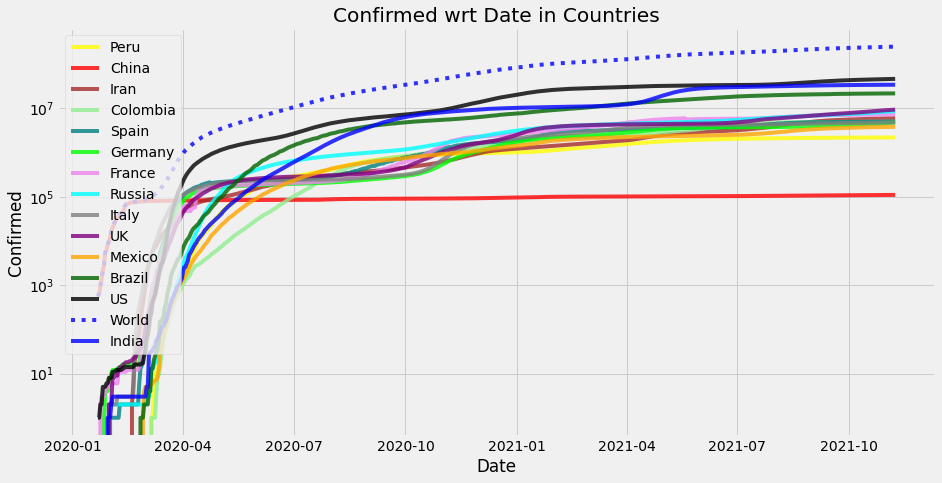

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-04,221,7632,1131,436,154,219,59,1165,46,155,15,37,158,0,24
2021-11-05,392,8533,2067,389,244,193,51,1159,26,141,27,39,132,0,23
2021-11-06,526,6499,384,328,543,155,31,1152,25,37,0,32,120,0,36
2021-11-07,266,4394,119,59,60,62,26,1146,11,34,0,45,126,0,21
2021-11-08,332,6690,1218,126,0,57,32,1164,58,168,54,38,140,0,39


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-11-04,401.67,7118.62,1316.23,282.14,233.94,166.96,42.04,1099.45,36.70,106.27,26.87,32.26,161.33,0.0,27.03
2021-11-05,400.46,7295.42,1410.08,295.49,235.20,170.22,43.16,1106.89,35.37,110.61,26.89,33.11,157.66,0.0,26.52
2021-11-06,416.15,7195.87,1281.82,299.56,273.68,168.31,41.64,1112.53,34.07,101.41,23.53,32.97,152.95,0.0,27.71
2021-11-07,397.38,6845.63,1136.46,269.49,246.97,155.03,39.68,1116.71,31.19,92.98,20.59,34.47,149.58,0.0,26.87
2021-11-08,389.21,6826.18,1146.66,251.55,216.10,142.77,38.72,1122.62,34.54,102.36,24.76,34.91,148.39,0.0,28.39


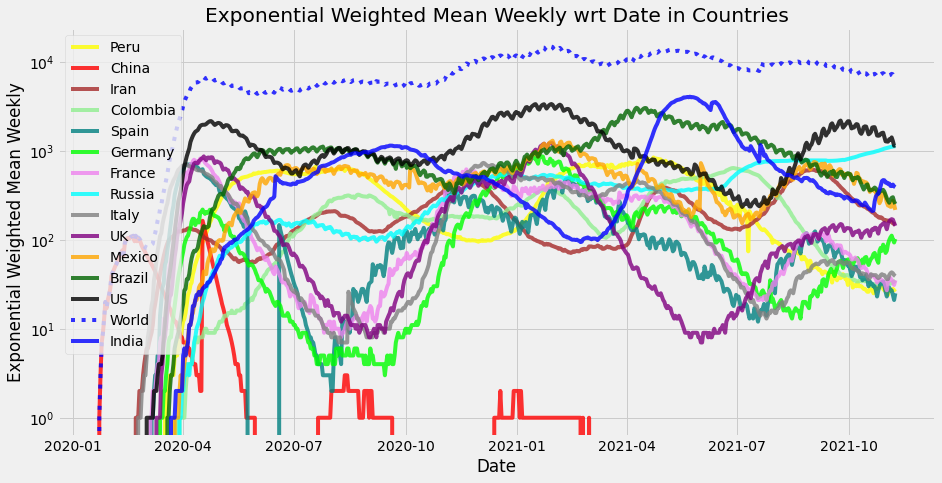

In [18]:
plotter(np.round(AVG), name)

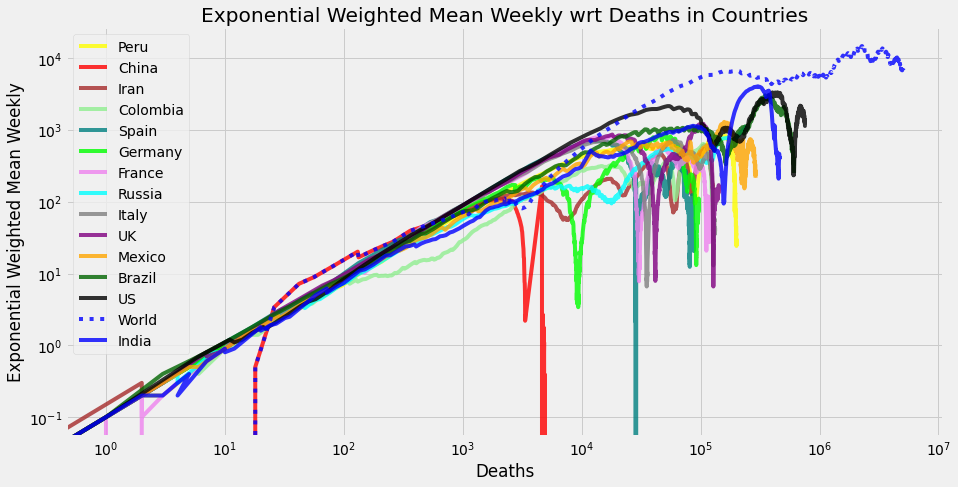

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

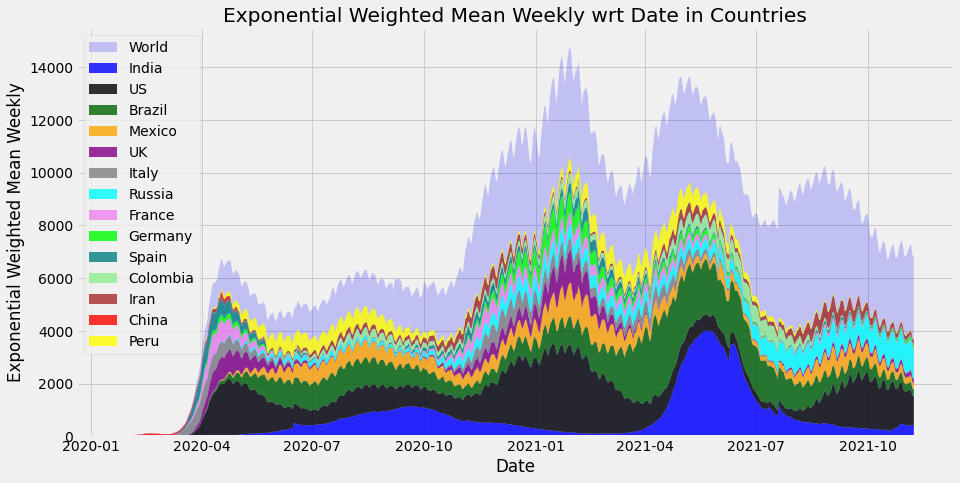

In [20]:
stackplotter(AVG, name)

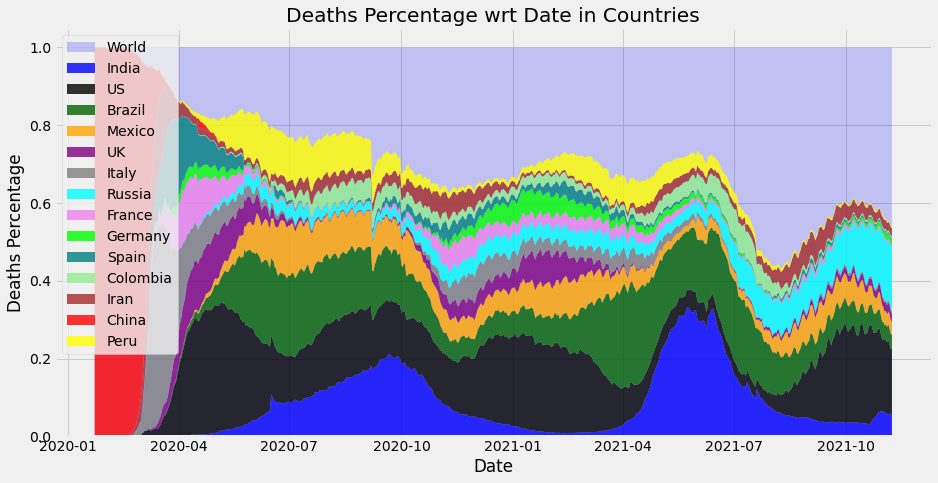

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

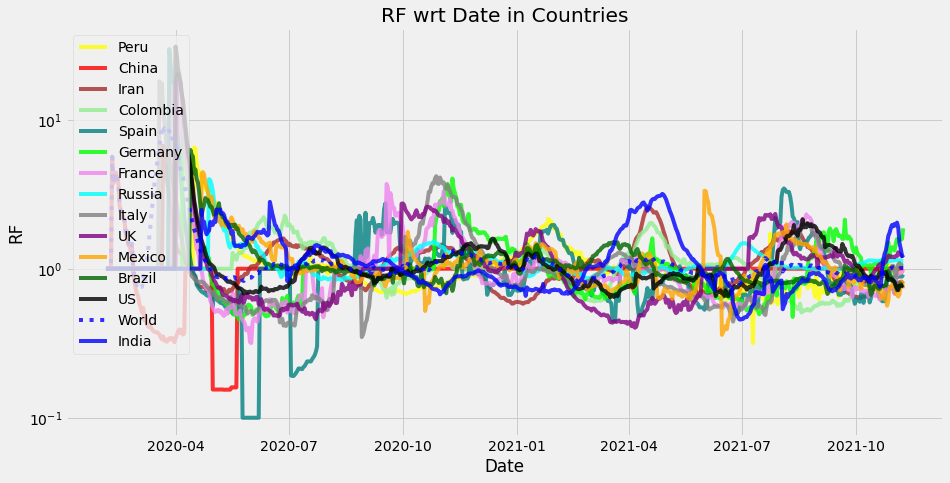

In [23]:
plotter(Reproductivity, 'RF')

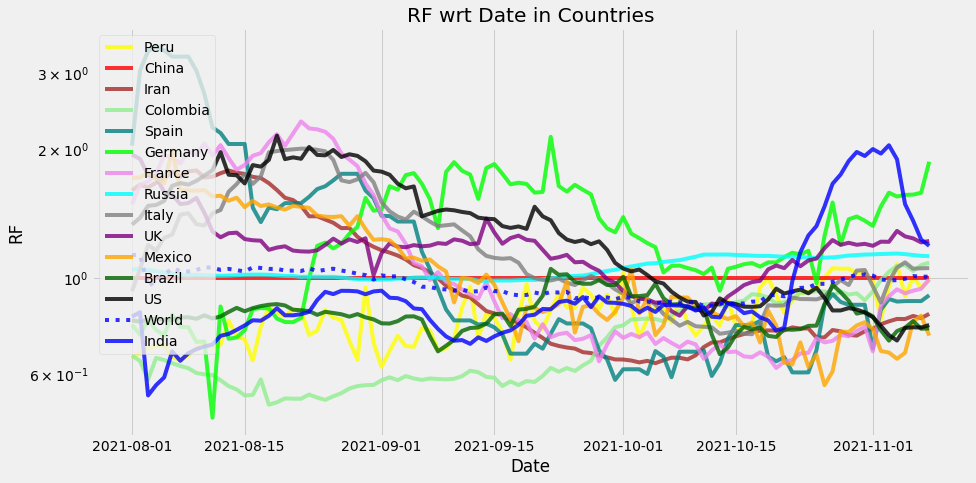

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

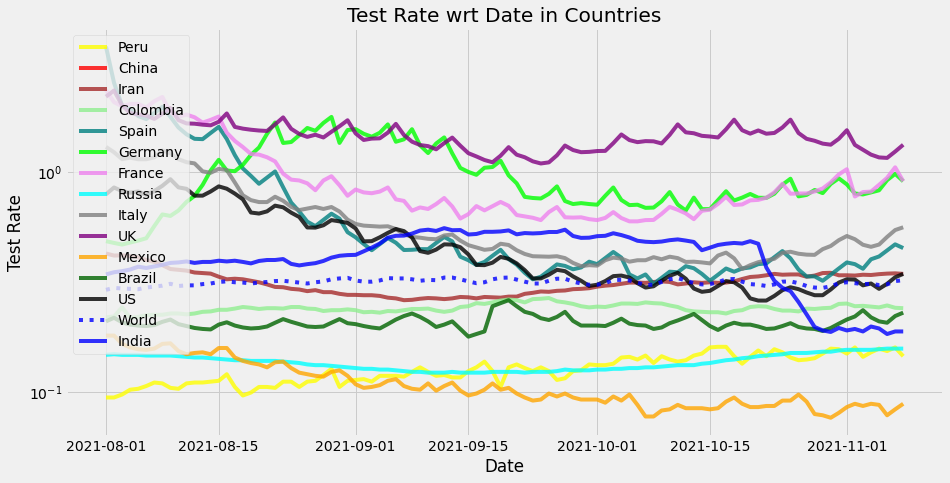

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

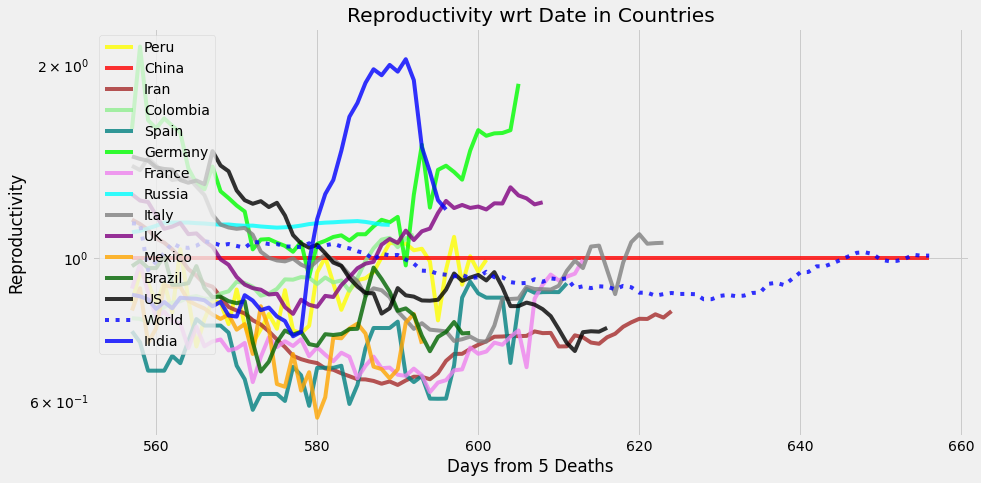

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

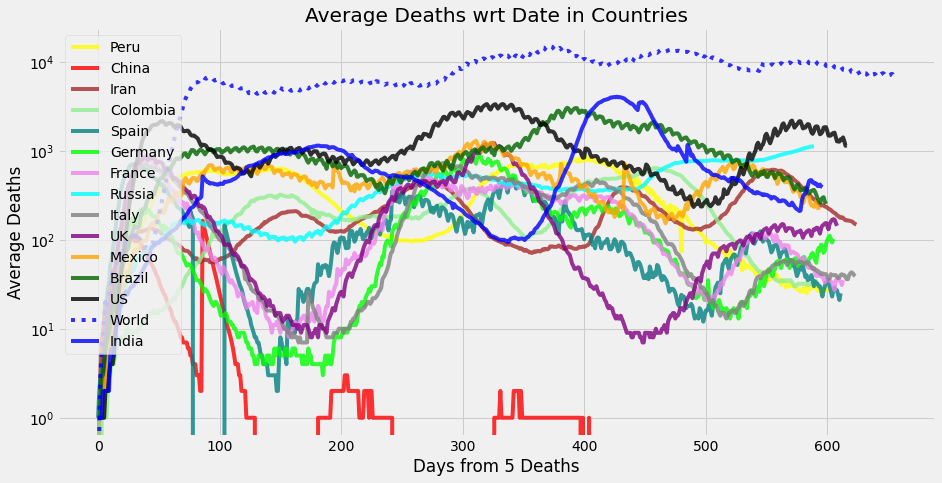

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

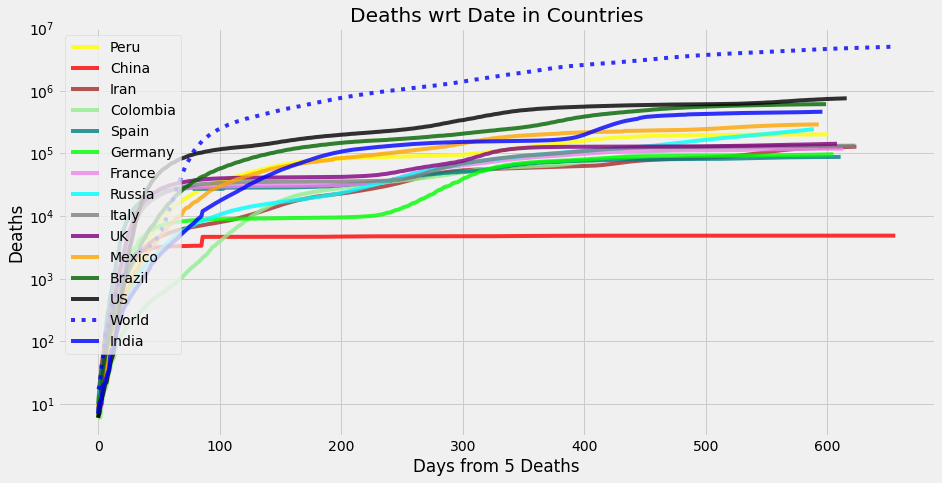

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5055955,6690,7042.29,6826.18,1.0097,250368196,0.322,439655,1011.19
US,755647,1218,1150.00,1146.66,0.7797,46613282,0.344,78872,151.13
Brazil,609573,126,235.86,251.55,0.7657,21886077,0.229,11498,121.91
India,461389,332,358.43,389.21,1.1908,34377113,0.188,14653,92.28
Mexico,289734,0,195.57,216.10,0.7366,3826786,0.088,3821,57.95
Russia,243405,1164,1155.29,1122.62,1.1271,8689818,0.157,35335,48.68
Peru,200469,39,27.57,28.39,0.9944,2207890,0.145,822,40.09
Indonesia,143557,12,19.14,23.25,0.5393,4248409,0.208,967,28.71
UK,142293,57,170.71,142.77,1.2218,9379286,1.334,38099,28.46


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,5055955,6690,7042.29,6826.18,1.0097,250368196,0.322,439655,1011.19
Russia,243405,1164,1155.29,1122.62,1.1271,8689818,0.157,35335,48.68
US,755647,1218,1150.00,1146.66,0.7797,46613282,0.344,78872,151.13
Ukraine,77156,499,679.14,588.39,1.4604,3233178,0.166,19582,15.43
Romania,50996,241,417.57,393.18,1.0983,1711137,0.132,10357,10.20
India,461389,332,358.43,389.21,1.1908,34377113,0.188,14653,92.28
Brazil,609573,126,235.86,251.55,0.7657,21886077,0.229,11498,121.91
Turkey,72314,187,212.29,209.55,0.9838,8261473,0.662,27726,14.46
Mexico,289734,0,195.57,216.10,0.7366,3826786,0.088,3821,57.95


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  5055955


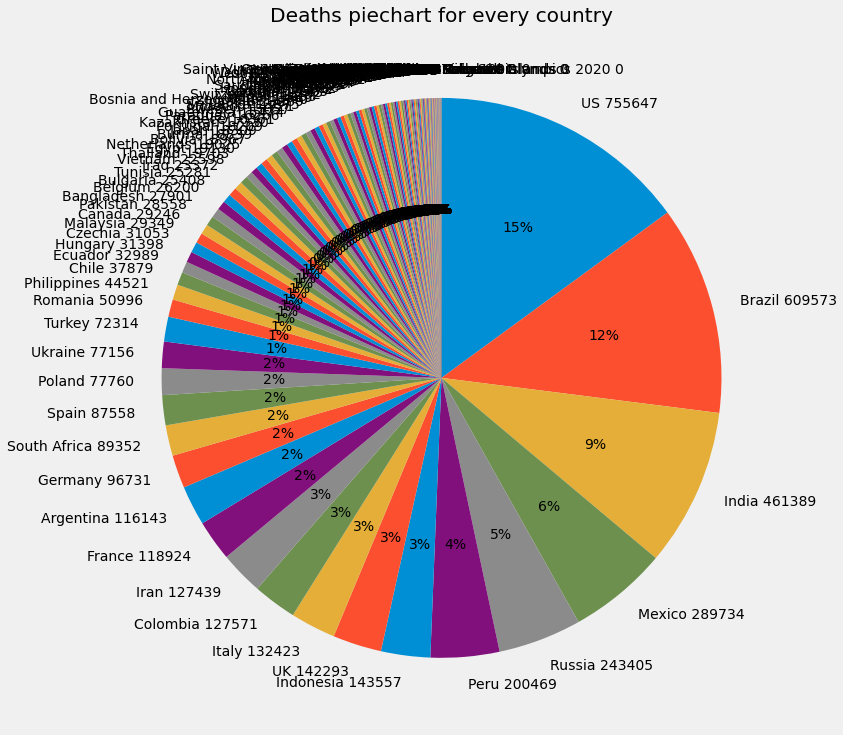

In [35]:
piechart('Deaths')

World total:  7042


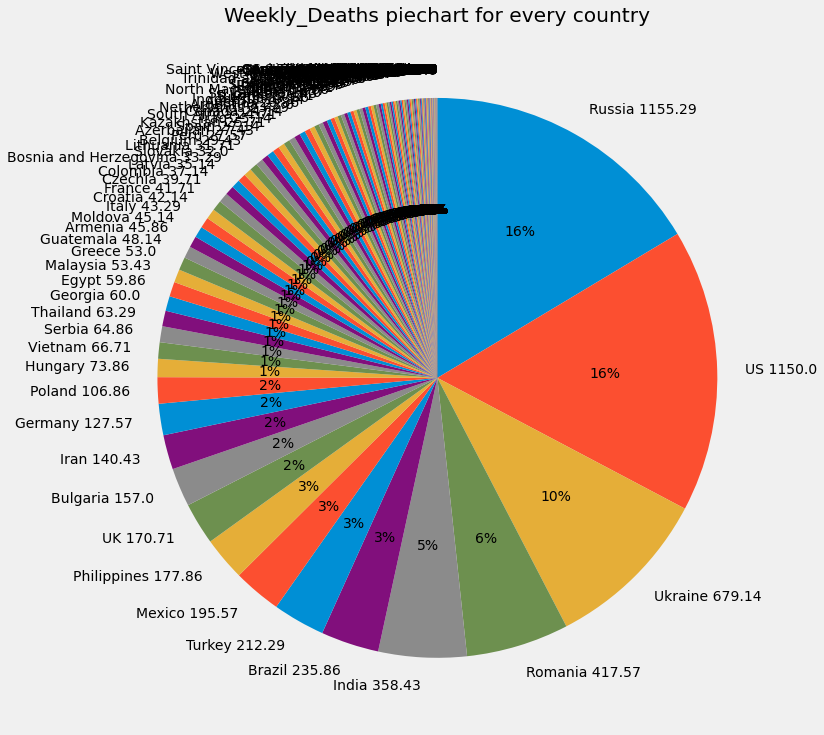

In [36]:
piechart('Weekly_Deaths')

World total:  6690


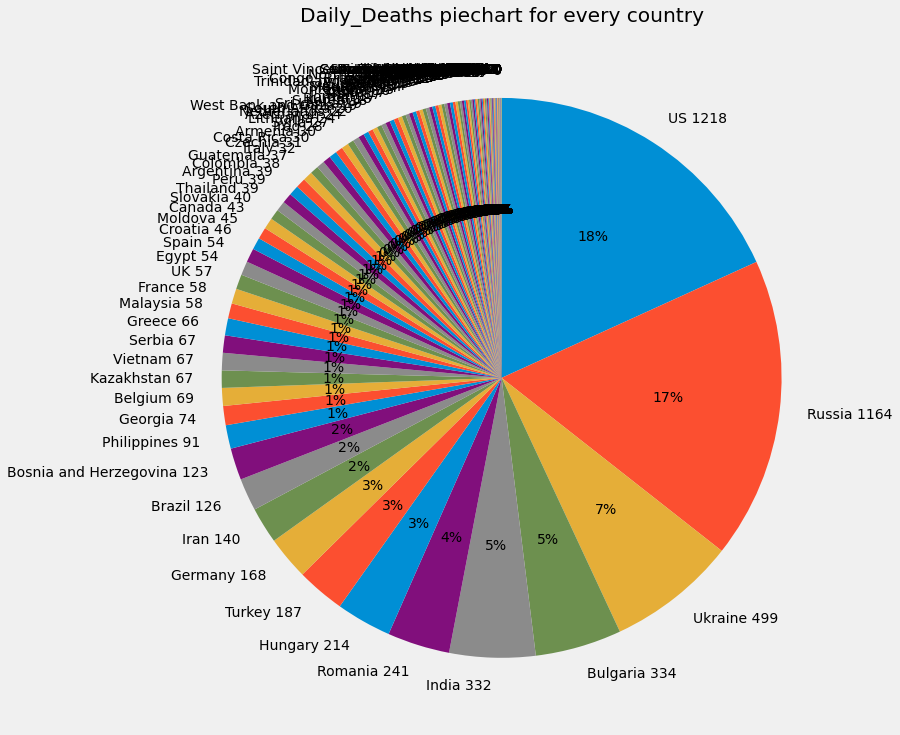

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-11-10


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

1011191000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master bbd187e] `date` update
 1 file changed, 2132 insertions(+), 2134 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (66%)


To https://github.com/Arrowheadahp/COVID-19.git
   1a86450..bbd187e  master -> master
